<a href="https://colab.research.google.com/github/sean-halpin/guided_diffusion/blob/main/test_diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q diffusers

In [ ]:
from diffusers import DiffusionPipeline, DDPMScheduler

In [ ]:
dp = DiffusionPipeline.from_pretrained('shalpin87/diffusion')
dpc = DiffusionPipeline.from_pretrained('shalpin87/diffusion_cifar')

Downloading:   0%|          | 0.00/455M [00:00<?, ?B/s]

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

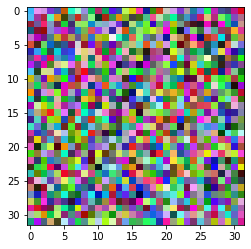

In [ ]:
nz = torch.randint(0, 255, (1,3,32,32))
nz.shape
plt.imshow((nz.permute(0,2,3,1)).squeeze(0))
plt.show()

In [ ]:
def plot_images(images):
  images_processed = (images * 255).round().astype("uint8")
  imgs_t = images_processed.transpose(0, 3, 1, 2)
  imgs_plt = images_processed.transpose(0, 1, 2, 3)

  fig = plt.figure(figsize=(8, 8))
  columns = 4
  rows = 4
  for i in range(1, columns*rows +1):
      img = imgs_plt[i-1]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()

In [ ]:
from PIL import Image
def save_images(images, path):
  images_processed = (images * 255).round().astype("uint8")
  imgs_t = images_processed.transpose(0, 3, 1, 2)
  imgs_plt = images_processed.transpose(0, 1, 2, 3)
  for i in range(0, len(imgs_plt)):
    img = Image.fromarray(imgs_plt[i])
    img.save(f'{path}/{i}.jpeg')

In [ ]:
batch_img_count=16

In [ ]:
!mkdir -p "./generated_cifar"
!mkdir -p "./generated_celeba"

  0%|          | 0/1000 [00:00<?, ?it/s]

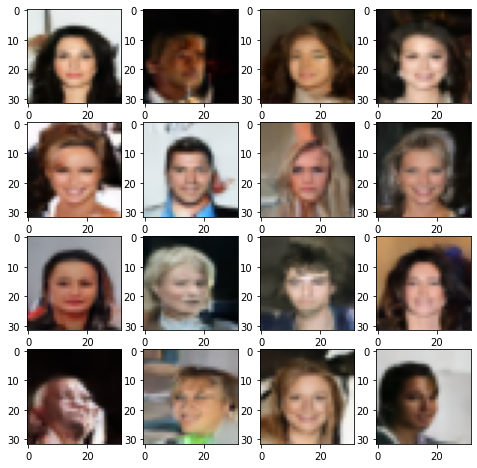

In [ ]:
generator = torch.manual_seed(0)
images = dp(generator=generator, batch_size=batch_img_count, output_type="numpy")["sample"]
plot_images(images)
save_images(images, "./generated_celeba")

  0%|          | 0/1000 [00:00<?, ?it/s]

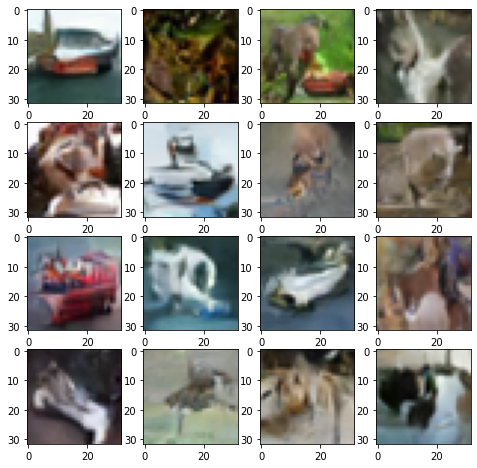

In [ ]:
generator = torch.manual_seed(0)
imagesc = dpc(generator=generator, batch_size=batch_img_count, output_type="numpy")["sample"]
plot_images(imagesc)
save_images(imagesc, "./generated_cifar")

In [ ]:
from torchvision.datasets import CelebA, CIFAR10
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!mkdir -p ./dataset_celeba
!rm -rf ./dataset_celeba/*
!cp -R ./drive/MyDrive/celeba/* ./dataset_celeba/celeba
!unzip "./dataset_celeba/celeba/img_align_celeba.zip" -d "./dataset_celeba/celeba"

In [ ]:
x_size = 32
y_size = x_size

dataset_cifar = CIFAR10(
  "./dataset_cifar/",
  download=True,
)

dataset_celeba = CelebA(
  "./dataset_celeba/",
  download=False,
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./dataset_cifar/cifar-10-python.tar.gz to ./dataset_cifar/


In [ ]:
!pip install pytorch-fid

In [ ]:
!python -m pytorch_fid "/content/dataset_celeba/celeba/img_align_celeba" "/content/generated_celeba/"

In [ ]:
!ls /content/generated_celeba/